In [1]:
import os
import igraph as ig
import matplotlib.pyplot as plt
import pandas as pd
from src.utils import plot_graph, prepare_graph, top_10_for_network, analyze_graph, prepare_graph_for_betweenness, prepare_graph_for_degree
from src.crud import get_author_to_author, get_distinct_authors
from src.config import get_db_connection
USE_MINI = False

In [2]:
if USE_MINI:
    db_path = "../../../data/twitter_small.db"
else:
    db_path = "../../../data/twitter.db"
con = get_db_connection(db_path=db_path, use_dict_reponses=False)
retweet_edges = get_author_to_author(con, response_type="retweeted")
reply_edges = get_author_to_author(con, response_type="replied_to")
con.close()
con = get_db_connection(db_path=db_path)
authors = get_distinct_authors(con)
con.close()
print(f"num vertices: {len(authors)}")
print(reply_edges[:3])
pd.DataFrame(retweet_edges).head()

num vertices: 481467
[('307001802', '41077970'), ('786625296', '338985020'), ('2431501916', '16717501')]


,0,1
0,1011975294,1471250628
1,255144027,313743136
2,214748274,4010449719
3,449273927,3114313702
4,1601937732,3310347050


# Part 1
## (Graphs)

In [3]:
retweet_graph = ig.Graph(len(authors))
retweet_graph["title"] = "Retweet network"
retweet_graph.vs["name"] = authors
retweet_graph.add_edges(retweet_edges)
retweet_graph, rt_layout = prepare_graph(
    retweet_graph,
    # layout=retweet_graph.layout_fruchterman_reingold(niter=150)
)
retweet_graph.summary()

'IGRAPH UN-- 481467 1225822 -- \n+ attr: title (g), color (v), frame_width (v), label (v), name (v), size (v), color (e), width (e)'

Plot saved to: retweet-graph-circle.png


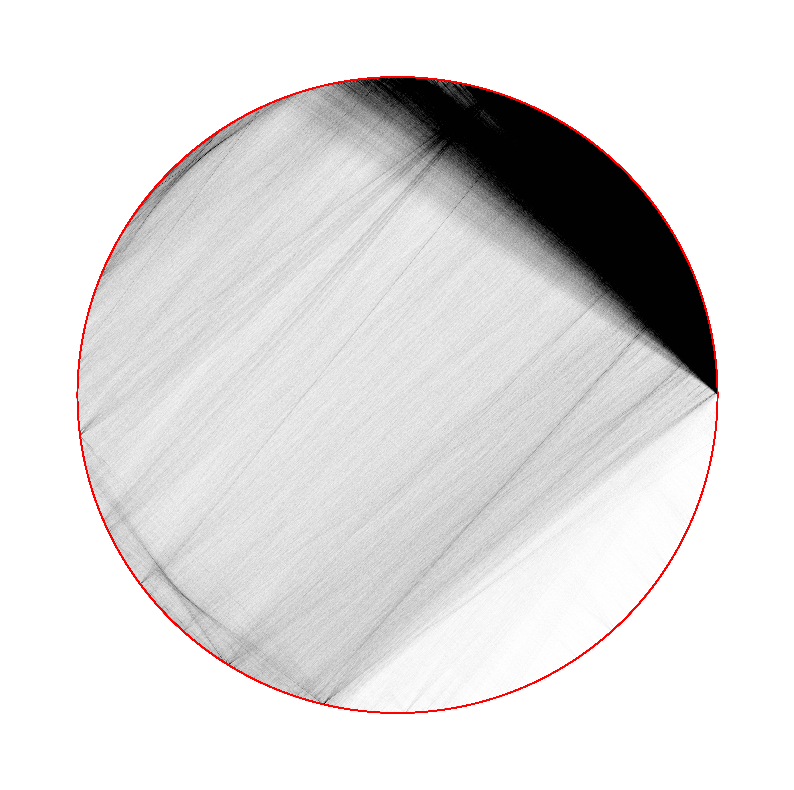

In [4]:
plot_graph(retweet_graph, layout=rt_layout, target_file="retweet-graph-circle.png")

In [5]:
reply_graph = ig.Graph(len(authors))
reply_graph["title"] = "reply network"
reply_graph.vs["name"] = authors
reply_graph.add_edges(reply_edges)
reply_graph.simplify()
reply_graph, rp_layout = prepare_graph(
    reply_graph,
    # layout=reply_graph.layout_fruchterman_reingold(niter=150),
)
reply_graph.summary()

'IGRAPH UN-- 481467 31250 -- \n+ attr: title (g), color (v), frame_width (v), label (v), name (v), size (v), color (e), width (e)'

Plot saved to: reply-graph-circle.png


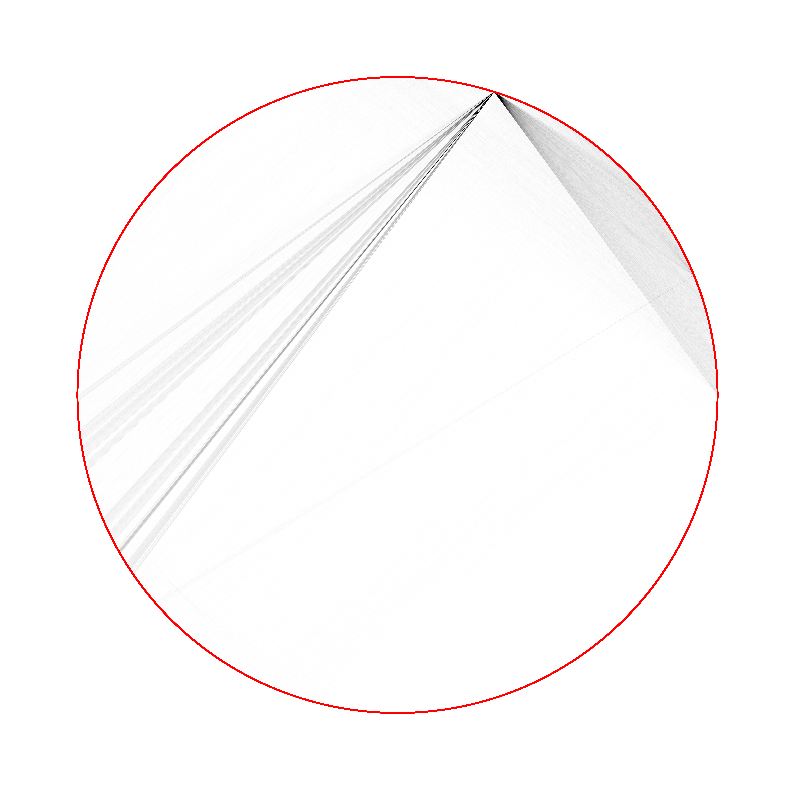

In [6]:
plot_graph(reply_graph, layout=rp_layout, target_file="reply-graph-circle.png")

## Task 1.6

In [7]:
top_degree_retweet, top_betweenness_retweet = top_10_for_network(retweet_graph)
print("Top ten Authors by degree:")
for item in top_degree_retweet.items():
    print(f"Author: f{item[0]}, d={item[1]}")
print("\nTop ten Authors by betweenness:")
for item in top_betweenness_retweet.items():
    print(f"Author: f{item[0]}, b={item[1]}")

Top ten Authors by degree:
Author: f17463923, d=24102
Author: f4339043357, d=21795
Author: f2617471956, d=19050
Author: f14159148, d=15068
Author: f4010449719, d=10645
Author: f3584633117, d=10329
Author: f3459051, d=8635
Author: f69032746, d=7546
Author: f338985020, d=7523
Author: f33933259, d=7418

Top ten Authors by betweenness:
Author: f4339043357, b=7788926160.581905
Author: f17463923, b=5208077606.046297
Author: f2617471956, b=3843915601.356852
Author: f14159148, b=2803992780.5584035
Author: f3584633117, b=2076549736.0219138
Author: f4010449719, b=1788674076.4362197
Author: f3459051, b=1340969514.9189503
Author: f338985020, b=1212554932.9511616
Author: f69032746, b=1182055379.1664655
Author: f33933259, b=1100922173.8899267


In [6]:
top_degree_reply, top_betweenness_reply = top_10_for_network(reply_graph)
print("REPLY NETWORK")
print("Top ten Authors by degree:")
for item in top_degree_reply.items():
    print(f"Author: f{item[0]}, d={item[1]}")
print("\nTop ten Authors by betweenness:")
for item in top_betweenness_reply.items():
    print(f"Author: f{item[0]}, b={item[1]}")

REPLY NETWORK
Top ten Authors by degree:
Author: f4339043357, d=13546
Author: f2617471956, d=1568
Author: f17463923, d=233
Author: f368980703, d=224
Author: f244013273, d=200
Author: f14159148, d=135
Author: f330826792, d=130
Author: f69032746, d=127
Author: f3584633117, d=124
Author: f3382476081, d=89

Top ten Authors by betweenness:
Author: f4339043357, b=290009484.18830454
Author: f2617471956, b=32789037.0150213
Author: f17463923, b=4608728.853726735
Author: f368980703, b=4101396.2654589606
Author: f244013273, b=3858604.706226033
Author: f3584633117, b=2740073.6861052113
Author: f14159148, b=2605238.0044980324
Author: f330826792, b=2575622.1465468276
Author: f69032746, b=2241192.9863911876
Author: f3382476081, b=1841236.9022222352


#### Prediction:
I expect all of the top authors to be in the top producers category.
TODO: load tsv and check prediction

In [7]:
acc_df = pd.read_csv("../../../data/accounts.tsv", delimiter="\t")

In [8]:
for author_id in top_degree_retweet.keys():
    author = acc_df[acc_df["author_id"] == author_id].values
    print(author)
    

NameError: name 'top_degree_retweet' is not defined

In [9]:
print("Top 10 reply authors status")
for author_id in top_degree_reply.keys():
    author = acc_df[acc_df["author_id"] == author_id].values
    print(author)

Top 10 reply authors status
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


## Task 1.7
(chose reply network)

Order: 24553
Size: 28827
No .of Components: 1
Size of largest component: 24553
Density: 9.563965581428792e-05
Transitivity: 9.069338813756669e-05


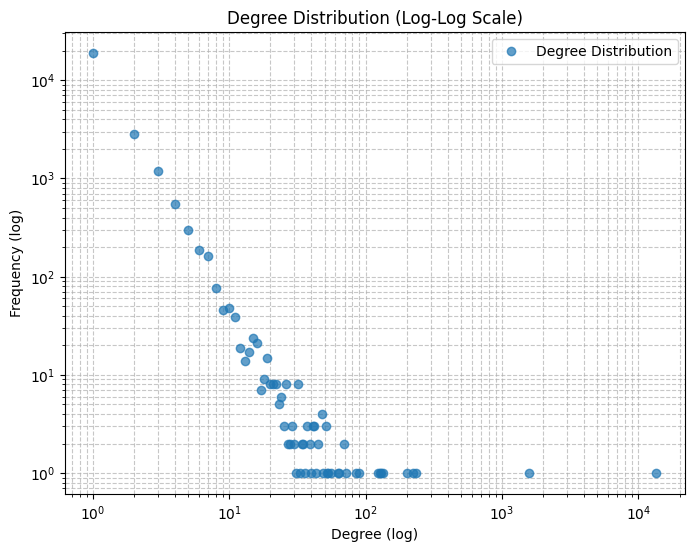

In [10]:
reply_giant = reply_graph.connected_components().giant()
analyze_graph(reply_giant)

# Task 2

In [11]:
# 2.1
order = reply_giant.vcount()
p = reply_giant.ecount() / (order * (order - 1) / 2)
erg1 = ig.Graph.Erdos_Renyi(n=order, p=p)
erg1.vs["name"] = reply_giant.vs["name"]
erg2 = ig.Graph.Erdos_Renyi(n=order, p=p)
erg3 = ig.Graph.Erdos_Renyi(n=order, p=p)

REPLY betweenness: ({'4339043357': 13546, '2617471956': 1568, '17463923': 233, '368980703': 224, '244013273': 200, '14159148': 135, '330826792': 130, '69032746': 127, '3584633117': 124, '3382476081': 89}, {'4339043357': 290009484.18830454, '2617471956': 32789037.0150213, '17463923': 4608728.853726735, '368980703': 4101396.2654589606, '244013273': 3858604.706226033, '3584633117': 2740073.6861052113, '14159148': 2605238.0044980324, '330826792': 2575622.1465468276, '69032746': 2241192.9863911876, '3382476081': 1841236.9022222352})
({'2844852231': 13, '74112925': 10, '218405995': 10, '101729324': 9, '39580472': 9, '1326060433': 9, '258856294': 9, '991088942': 9, '372953935': 9, '219896995': 9}, {'2208578173': 1736863.9801773976, '4099624692': 1725324.6720387007, '2742829706': 1538868.8794915106, '218405995': 1463328.9422927047, '15208768': 1435951.4149224225, '900832400': 1415998.141672247, '74386762': 1395765.0853717907, '901883388': 1376038.9676868457, '372953935': 1367114.0649465963, '2

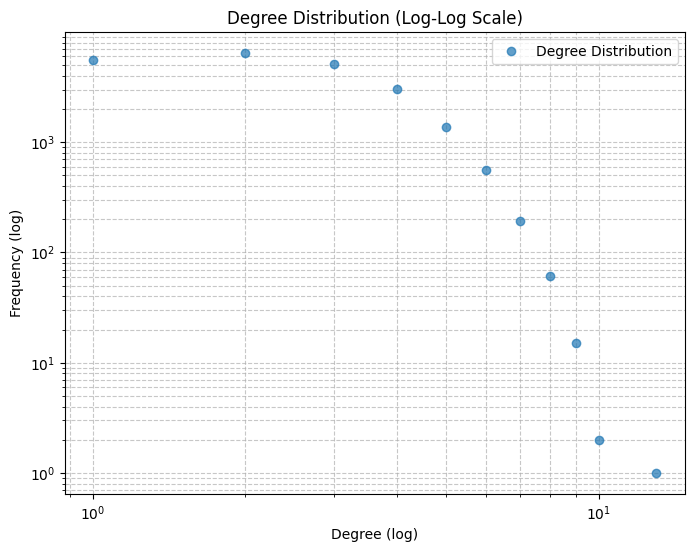

Order: 24553
Size: 28902
No .of Components: 2724
Size of largest component: 21377
Density: 9.588848414141428e-05
Transitivity: 4.40089191409459e-05


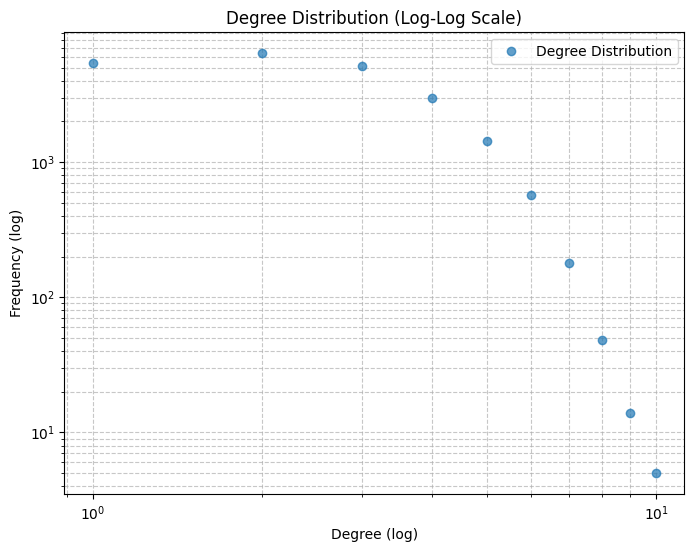

Order: 24553
Size: 28902
No .of Components: 2724
Size of largest component: 21377
Density: 9.588848414141428e-05
Transitivity: 4.40089191409459e-05


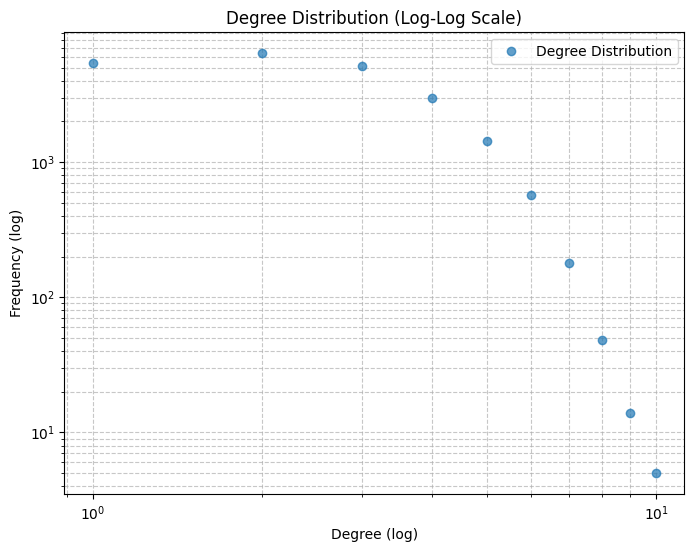

Order: 24553
Size: 28698
No .of Components: 2810
Size of largest component: 21329
Density: 9.521167109163057e-05
Transitivity: 4.442535799434317e-05


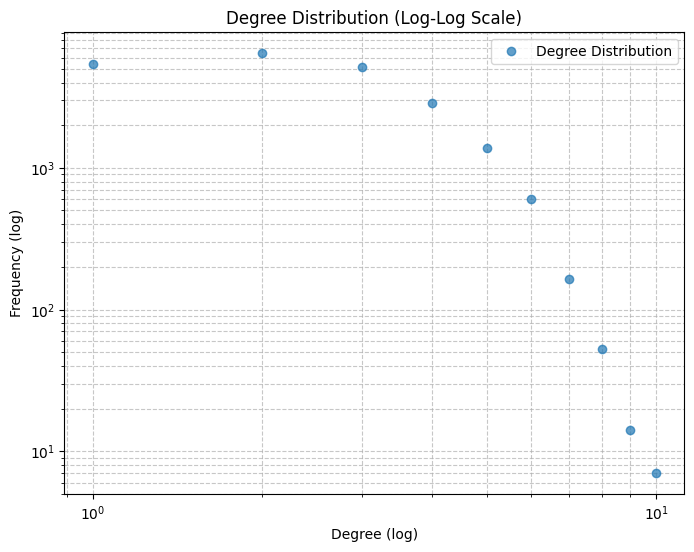

In [24]:
print(top_10_for_network(erg1))
analyze_graph(erg1)
analyze_graph(erg2)
analyze_graph(erg3)

> The erdos renyi graphs look mostly the same (which is to be expected since they are using the
> same probability nad order. Compared to the reply network, the degree distributions do not
> follow a pareto or exponential distribution. In other words, the ER graphs do not have
> a majority of nodes with very very few connections and a few nodes with many many connections.
> So even though the networks have the same properties in terms of Order and (roughly) size, they
> are quite different in terms of degree and betweenness.

In [12]:
# 2.2
avg_degree = reply_giant.ecount() / order
m = round(avg_degree)
bg1 = ig.Graph.Barabasi(n=order, m=m)
bg1.vs["name"] = reply_giant.vs["name"]
bg2 = ig.Graph.Barabasi(n=order, m=m)
bg3 = ig.Graph.Barabasi(n=order, m=m)

({'2350315591': 106, '255144027': 95, '16073596': 64, '314125926': 58, '15046379': 47, '3141850216': 45, '156772034': 43, '312335223': 42, '1011975294': 37, '620217524': 36}, {'255144027': 207662396.0, '190544832': 194570058.0, '2350315591': 154245478.0, '459796949': 135583444.0, '1011975294': 71247305.0, '16073596': 69965020.0, '307001802': 63346008.0, '313889864': 45571430.0, '620217524': 35112151.0, '305851986': 33479031.0})
Order: 24553
Size: 24552
No .of Components: 1
Size of largest component: 24553
Density: 8.145644116808537e-05
Transitivity: 0.0


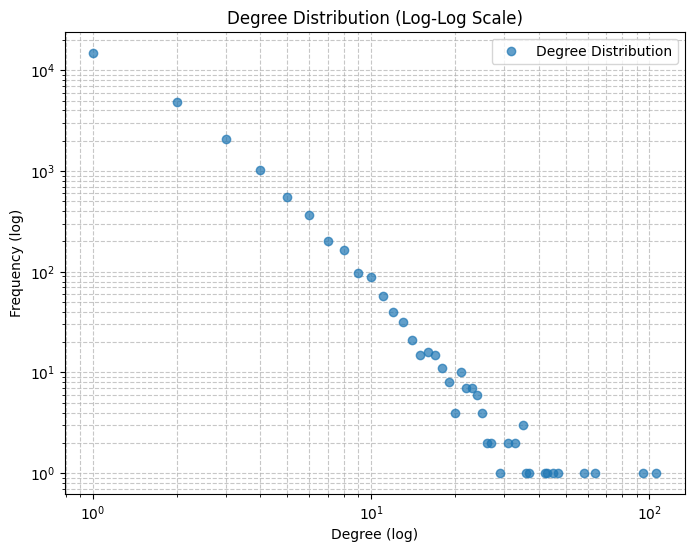

Order: 24553
Size: 24552
No .of Components: 1
Size of largest component: 24553
Density: 8.145644116808537e-05
Transitivity: 0.0


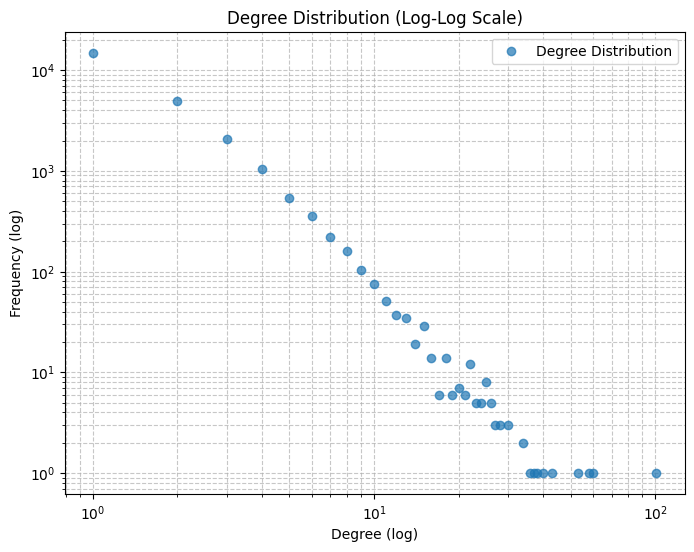

Order: 24553
Size: 24552
No .of Components: 1
Size of largest component: 24553
Density: 8.145644116808537e-05
Transitivity: 0.0


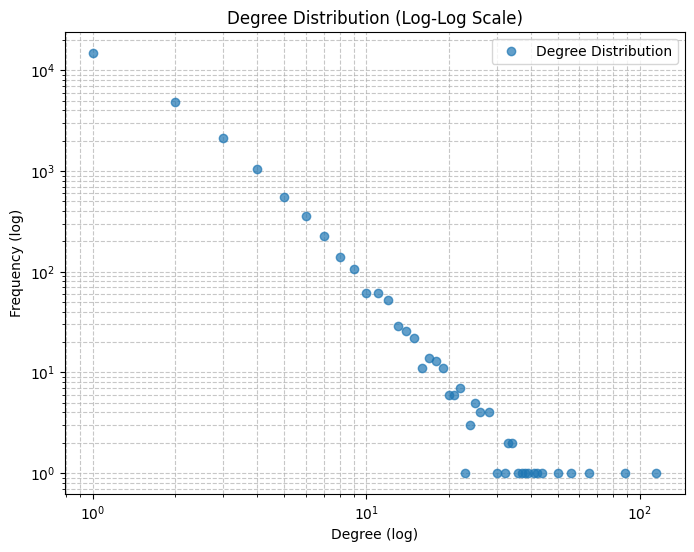

In [13]:
print(top_10_for_network(bg1))
analyze_graph(bg1)
analyze_graph(bg2)
analyze_graph(bg3)

> The BA models are more similar to the actual netowrk than ER graphs but
> still misses the mark on the right tail.
> That is, they exhibit an exponential distribution but seem to me missing the nodes
> that have particularly many edges. Additionally the simulated graphs are also
> now a single connected component as in our reply giant component.

In [49]:
# 2.3
nei = round(reply_giant.average_path_length())
swg1 = ig.Graph.Watts_Strogatz(dim=1, size=order, nei=nei, p=0.16)
swg2 = ig.Graph.Watts_Strogatz(dim=1, size=order, nei=nei, p=0.16)
swg3 = ig.Graph.Watts_Strogatz(dim=1, size=order, nei=nei, p=0.5)
print("Target avg path = 3, clst coeff = 0.00009069338813756669")
print(f"avg path: {swg1.average_path_length()}")
print("with p=.5")
print(f"avg path: {swg3.average_path_length()}")

Target avg path = 3, clst coeff = 0.00009069338813756669
avg path: 5.841555871918137
with p=.5
avg path: 5.936338083240369


Order: 24553
Size: 73659
No .of Components: 54
Size of largest component: 24500
Density: 0.00024437927663734115
Transitivity: 0.00020318136872000253


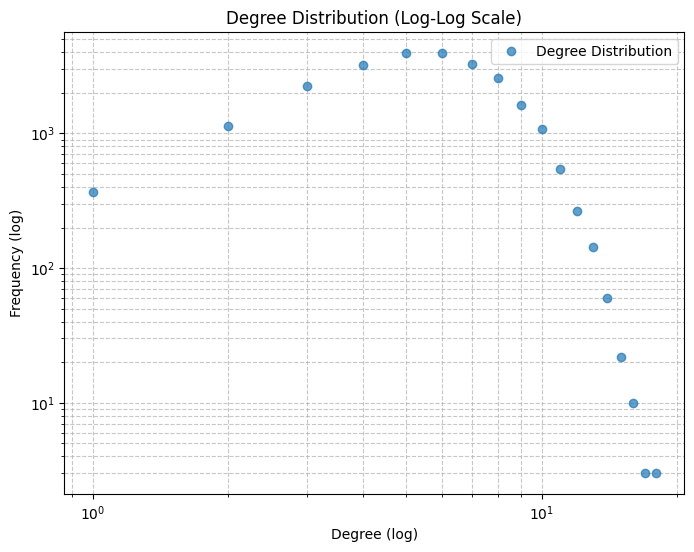

Order: 24553
Size: 73659
No .of Components: 51
Size of largest component: 24503
Density: 0.00024437927663734115
Transitivity: 0.00023105255766120447


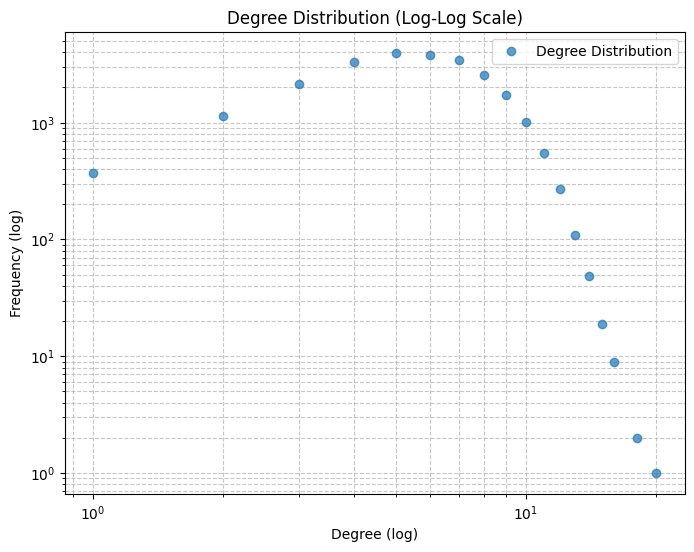

Order: 24553
Size: 73659
No .of Components: 20
Size of largest component: 24534
Density: 0.00024437927663734115
Transitivity: 0.008203083528953794


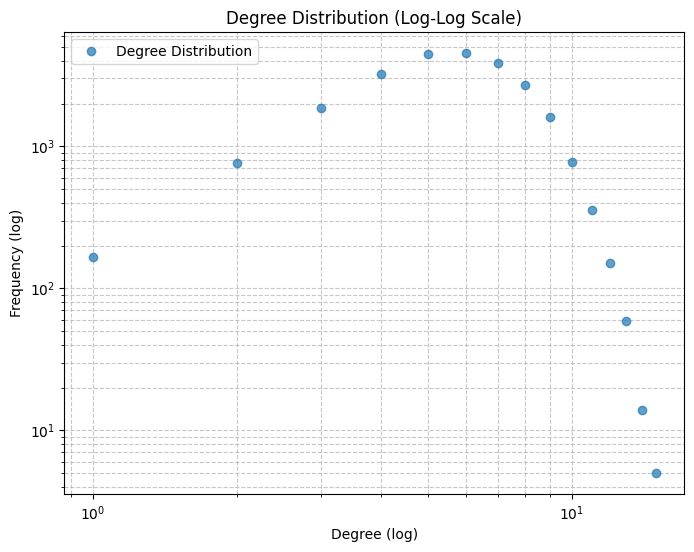

In [50]:
analyze_graph(swg1)
analyze_graph(swg2)
analyze_graph(swg3)

Order: 24553
Size: 28827
No .of Components: 1539
Size of largest component: 21373
Density: 9.563965581428792e-05
Transitivity: 0.00018380140322235292


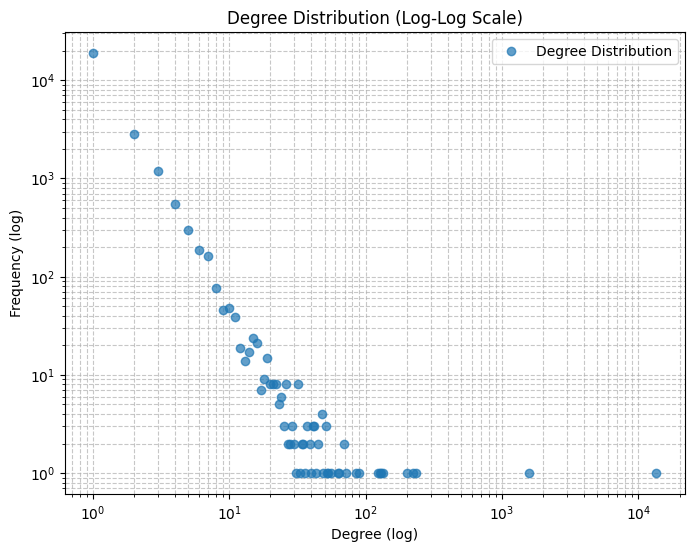

Order: 24553
Size: 28827
No .of Components: 1
Size of largest component: 24553
Density: 9.563965581428792e-05
Transitivity: 9.069338813756669e-05


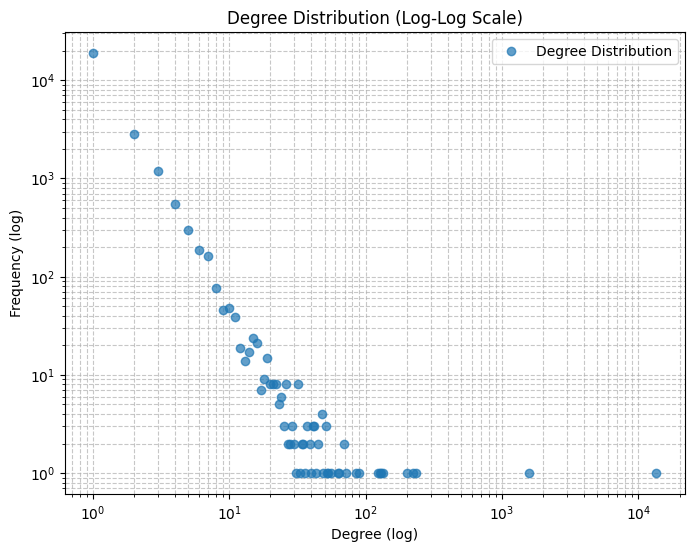

In [55]:
# 2.4
rewired = reply_giant.copy()
rewired.rewire()
analyze_graph(rewired)
analyze_graph(reply_giant)